<a href="https://colab.research.google.com/github/RahulTechTutorials/Deep_learning/blob/master/IMDB_Classification_word_embedding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import imdb
from keras import preprocessing

max_features = 1000
maxlen = 20





Using TensorFlow backend.


In [0]:
#!pip install numpy==1.16.1

In [3]:
(x_train, y_train), (x_test,y_test) = imdb.load_data(num_words = max_features)

17465344/17464789 [==============================] - 1s 0us/step


In [4]:
x_train.shape, x_test.shape

((25000,), (25000,))

In [5]:
for i,seq in enumerate(x_train):
  if i > 10:
    break
  else:
    print(i,':', len(seq))

0 : 218
1 : 189
2 : 141
3 : 550
4 : 147
5 : 43
6 : 123
7 : 562
8 : 233
9 : 130
10 : 450


In [6]:
for i,seq in enumerate(x_test):
  if i > 10:
    break
  else:
    print(i,':', len(seq))

0 : 68
1 : 260
2 : 603
3 : 181
4 : 108
5 : 132
6 : 761
7 : 180
8 : 134
9 : 370
10 : 209


In [0]:
x_train = preprocessing.sequence.pad_sequences(x_train,maxlen=maxlen)
x_test = preprocessing.sequence.pad_sequences(x_test,maxlen=maxlen)

In [8]:
for i,seq in enumerate(x_train):
  if i > 10:
    break
  else:
    print(i,':', len(seq))

0 : 20
1 : 20
2 : 20
3 : 20
4 : 20
5 : 20
6 : 20
7 : 20
8 : 20
9 : 20
10 : 20


In [9]:
for i,seq in enumerate(x_test):
  if i > 10:
    break
  else:
    print(i,':', len(seq))

0 : 20
1 : 20
2 : 20
3 : 20
4 : 20
5 : 20
6 : 20
7 : 20
8 : 20
9 : 20
10 : 20


In [10]:
x_train.shape, x_test.shape

((25000, 20), (25000, 20))

In [11]:

word_index = imdb.get_word_index()
reverse_word_index = dict([(value,key) for (key,value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i-3,'?') for i in x_train[0]])
  

1646592/1641221 [==============================] - 0s 0us/step


In [12]:
decoded_review

'story was so ? because it was true and was ? life after all that was ? with us all'

In [0]:
decoded_review = ' '.join([reverse_word_index.get(i-3,'?') for i in x_train[1]])

In [14]:
decoded_review

'on the ? that was the ? and have a good old laugh at how bad everything was back then'

In [15]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Embedding

model = Sequential()
model.add(Embedding(10000, 8, input_length=maxlen))
model.add(Flatten())
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['acc'])


W0625 03:15:47.776561 140603048417152 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0625 03:15:47.974793 140603048417152 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0625 03:15:47.985264 140603048417152 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0625 03:15:48.021312 140603048417152 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0625 03:15:48.038933 140603048417152 deprecation_wrappe

In [16]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 20, 8)             80000     
_________________________________________________________________
flatten_1 (Flatten)          (None, 160)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 161       
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________


In [17]:
history = model.fit(x_train,y_train, epochs = 10, batch_size = 32, validation_split = 0.2)

W0625 03:15:53.106056 140603048417152 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 6s 285us/step - loss: 0.6772 - acc: 0.6006 - val_loss: 0.6448 - val_acc: 0.6704
Epoch 2/10
20000/20000 [==============================] - 2s 88us/step - loss: 0.5830 - acc: 0.7188 - val_loss: 0.5629 - val_acc: 0.7046
Epoch 3/10
20000/20000 [==============================] - 2s 87us/step - loss: 0.5152 - acc: 0.7464 - val_loss: 0.5362 - val_acc: 0.7208
Epoch 4/10
20000/20000 [==============================] - 2s 88us/step - loss: 0.4879 - acc: 0.7607 - val_loss: 0.5299 - val_acc: 0.7292
Epoch 5/10
20000/20000 [==============================] - 2s 89us/step - loss: 0.4731 - acc: 0.7694 - val_loss: 0.5290 - val_acc: 0.7334
Epoch 6/10
20000/20000 [==============================] - 2s 89us/step - loss: 0.4633 - acc: 0.7773 - val_loss: 0.5317 - val_acc: 0.7344
Epoch 7/10
20000/20000 [==============================] - 2s 87us/step - loss: 0.4548 - acc: 0.7819 - val_loss: 0.5333 - val_acc

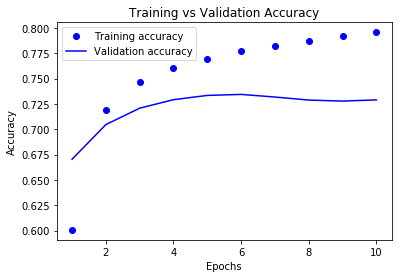

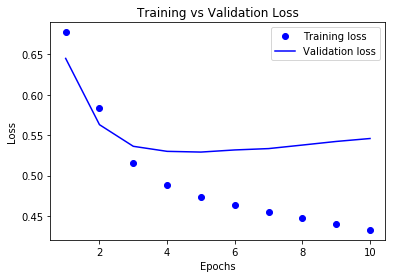

In [18]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = list(range(1,len(acc)+1))
plt.plot(epochs,acc,'bo',label='Training accuracy')
plt.plot(epochs,val_acc,'b',label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()

plt.show()

# **Accuracy Achieved - 72%**
## **(with Embedding and one Dense layer )**

We have achived 72% with just one embedding and dense layer which is not bad, however we should make use of RNN here so as to understand the embedding more thoroughly

Now lets use the raw IMDB dataset and then we will be using Word2Vec or Glove

In [0]:
import os, shutil
from google.colab import drive
from tqdm import tqdm
import pickle

In [51]:
drive.mount('/gdrive')
%cd /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


In [24]:
os.getcwd()

'/gdrive/My Drive/colab_datasets/base_dir_imdb/aclImdb'

In [0]:
os.chdir('/gdrive/My Drive/colab_datasets/base_dir_imdb/aclImdb')

In [0]:
base_dir = '/gdrive/My Drive/colab_datasets/base_dir_imdb/aclImdb'

In [52]:
train_dir = os.path.join(base_dir,'train')
test_dir = os.path.join(base_dir,'test')

texts = []
labels = []

for label_type in ['neg','pos']:
  dir_name = os.path.join(train_dir,label_type)
  print(dir_name)
  for file in tqdm(os.listdir(dir_name)):
    if file.endswith('.txt'):
      file_path = os.path.join(dir_name,file)
      with open(file_path) as f_name:
        texts.append(f_name.read())
        if label_type == 'neg':
          labels.append(0)
        else:
          labels.append(1)


  0%|          | 43/12500 [00:00<00:29, 429.10it/s]

/gdrive/My Drive/colab_datasets/base_dir_imdb/aclImdb/train/neg


  0%|          | 0/12500 [00:00<?, ?it/s]

/gdrive/My Drive/colab_datasets/base_dir_imdb/aclImdb/train/pos


100%|██████████| 12500/12500 [1:01:03<00:00,  3.20it/s]


In [0]:
import pickle
os.chdir('/gdrive/My Drive/colab_datasets/base_dir_imdb/aclImdb/saved_models')
filename1 = open('texts_serialized.pkl','wb')
pickle.dump(texts,filename1)
filename1.close()
filename2 = open('labels_serialized.pkl','wb')
pickle.dump(labels,filename2)
filename2.close()



In [55]:
len(labels), len(texts)

(25000, 25000)

In [0]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

maxlength = 100
training_samples = 200
validation_samples = 10000
max_words = 10000
tokenizer = Tokenizer(num_words = max_words )


In [58]:
tokenizer.word_index

{}

In [0]:
tokenizer.fit_on_texts(texts)

In [63]:
for i,j in tokenizer.word_index.items():
  if j > 10:
    break
  else:
    print(i,j)

the 1
and 2
a 3
of 4
to 5
is 6
br 7
in 8
it 9
i 10


In [0]:
sequences = tokenizer.texts_to_sequences(texts)

In [67]:
print(len(sequences))
print(len(sequences[0] ))

25000
62


In [72]:
word_index = tokenizer.word_index
print('found {} unique token'.format(len(word_index)))
data = pad_sequences(sequences,maxlen = maxlength)

found 88582 unique token


In [79]:
print(len(sequences))
print(len(sequences[0] ))
print(len(data[1] ))
print(type(data))

25000
62
100
<class 'numpy.ndarray'>


In [81]:
import numpy as np
labels = np.asarray(labels)
print('Data shape:', data.shape)
print('Label shape:', labels.shape)

Data shape: (25000, 100)
Label shape: (25000,)


Now we will shuffle the indices and then pick the train and validation data 

In [0]:
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples : training_samples + validation_samples]
y_val = labels[training_samples : training_samples + validation_samples]

In [83]:
x_train.shape, y_train.shape, x_val.shape, y_val.shape

((200, 100), (200,), (10000, 100), (10000,))